# Import libraries

In [52]:
import numpy as pd

import pandas as pd
pd.set_option('display.max_columns', 1000)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.linear_model import LogisticRegression

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Classification metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Exploratoring data

In [53]:
#Read dataset Titanic
df = pd.read_csv('csv/train.csv')

In [54]:
# (number observations, number features)
df.shape

(891, 12)

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
#type columns 
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

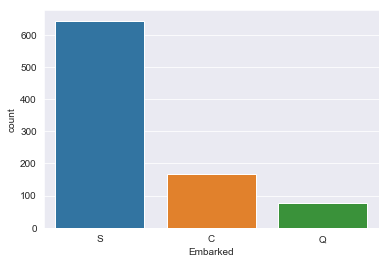

In [57]:
##### Inform
sns.countplot(df.Embarked)

In [58]:
df[df.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [59]:
#items null
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

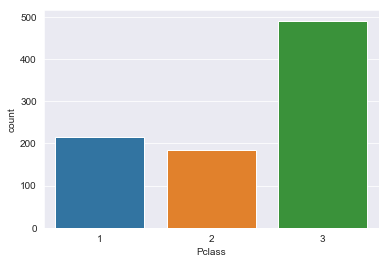

In [60]:
#Count classes 1,2,3
sns.countplot( x='Pclass', data = df)
plt.show()

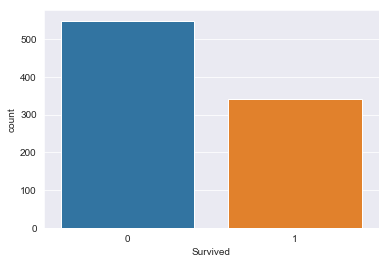

In [61]:
#Count survived 0= male, 1= female
sns.countplot( x='Survived', data=df )
plt.show()

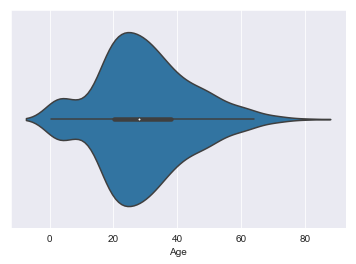

In [62]:
#violin Age
sns.violinplot (x='Age', data=df)
plt.show()

In [63]:
#Create copy data
cleaned_data = df.copy()

In [64]:
#Drop columns Cabin & Ticket
cleaned_data= cleaned_data.drop(['Cabin', 'Ticket'],axis=1)

In [65]:
#Replace values male=0, female=1
cleaned_data= cleaned_data.replace(["male", "female"], [0,1])
cleaned_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


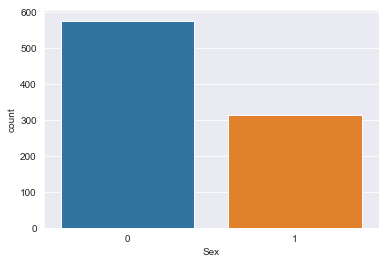

In [66]:
#Count Sex
sns.countplot(x='Sex',data=cleaned_data)
plt.show()

In [67]:
# Count nan values
cleaned_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [68]:
#Replace nan values by mean age
cleaned_data['Age'].fillna(cleaned_data['Age'].mean(), inplace=True)

In [69]:
#Replace nan values of column Embarked by missing 
cleaned_data['Embarked'].fillna( 'S', inplace=True)

In [70]:
#Verify nan values
cleaned_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [71]:
# Survived by class and sex
cleaned_data.groupby(['Pclass','Sex'])['Survived'].sum()

Pclass  Sex
1       0      45
        1      91
2       0      17
        1      70
3       0      47
        1      72
Name: Survived, dtype: int64

# Features engineering

In [72]:
cleaned_data['family_members'] = cleaned_data.SibSp + cleaned_data.Parch

In [73]:
cleaned_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,S,0
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,8.4583,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,51.8625,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,21.0750,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,11.1333,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,30.0708,C,1


In [74]:
cleaned_data = cleaned_data.drop(['SibSp', 'Parch', 'Name','Fare'], axis=1)

In [75]:
#Get dummies variables
abt = pd.get_dummies( cleaned_data, columns=['Embarked'] )

In [76]:
abt.head()

,PassengerId,Survived,Pclass,Sex,Age,family_members,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,0,1
1,2,1,1,1,38.0,1,1,0,0
2,3,1,3,1,26.0,0,0,0,1
3,4,1,1,1,35.0,1,0,0,1
4,5,0,3,0,35.0,0,0,0,1


In [77]:
abt.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Sex               0
Age               0
family_members    0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
dtype: int64

In [78]:
def cleaning_data(df):
    #Create copy data
    cleaned_data = df.copy()
    
    #Drop columns Cabin & Ticket
    cleaned_data= cleaned_data.drop(['Cabin', 'Ticket'],axis=1)
    
    #Replace values male=0, female=1
    cleaned_data= cleaned_data.replace(["male", "female"], [0,1])
    
    #Replace nan values by mean age
    cleaned_data['Age'].fillna(cleaned_data['Age'].mean(), inplace=True)
    
    #Replace nan values of column Embarked by missing 
    cleaned_data['Embarked'].fillna( 'missing', inplace=True)
    
    cleaned_data['family_members'] = cleaned_data.SibSp + cleaned_data.Parch
    
    cleaned_data = cleaned_data.drop(['SibSp', 'Parch', 'Name','Fare'], axis=1)
    
    #Get dummies variables
    abt = pd.get_dummies( cleaned_data, columns=['Embarked'] )
    
    return abt

# Model training Logistic Regression


In [79]:
# X & y
X = abt.drop('Survived', axis =1)
y = abt.Survived

In [80]:
# Split X and y into train and test sets
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size= 0.2, random_state= 1234)


In [81]:
# Instance of model 
model = LogisticRegression(random_state=123)

In [82]:
# Fitting model
model.fit(X_train,y_train)

C:\Users\Formation\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Predictions

In [83]:
# Predictions
pred_class= model.predict(X_val)

In [84]:
pred_class[:10]

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [85]:
# Matrix confusion
# 102 True positive
# 20 False negative
# 7 False positive
# 50 True negative
cm= confusion_matrix(y_val, pred_class)
print(cm)

[[101   8]
 [ 21  49]]


In [86]:
#True positives (TP)
# 0--> (+) (+)
tp= cm[1][1]

#False Positives (FP)
fp= cm[0][1]

#True negatives (TN)
tn= cm[0][0]

#False negative (FN)
fn=cm[1][0]

true_positive_rate = tp / (tp + fn)
print( 'TPR:', true_positive_rate )

false_positive_rate = fp / (fp + tn)
print( 'FPR:', false_positive_rate )

TPR: 0.7
FPR: 0.07339449541284404


In [87]:
# Probability tp et 
pred= model.predict_proba(X_val)

In [88]:
pred[:10]

array([[0.09617623, 0.90382377],
       [0.85501048, 0.14498952],
       [0.89360595, 0.10639405],
       [0.12928097, 0.87071903],
       [0.46882219, 0.53117781],
       [0.58167467, 0.41832533],
       [0.5190578 , 0.4809422 ],
       [0.35953286, 0.64046714],
       [0.90608275, 0.09391725],
       [0.83701513, 0.16298487]])

In [89]:
# Get probability of positive class
pred= [ p[1] for p in pred]

In [90]:
pred[:10]

[0.9038237676071746,
 0.14498952043555857,
 0.10639405203730824,
 0.8707190316219715,
 0.5311778061969558,
 0.41832532816732104,
 0.48094219837883373,
 0.6404671398175137,
 0.09391724875507448,
 0.16298486530353487]

In [91]:
# Calculate ROC curve from y_val and pred
fpr, tpr, thresholds = roc_curve(y_val, pred)

In [92]:
#pd.DataFrame({'FPR': fpr, 'TPR' : tpr, 'Thresholds' : thresholds})

No handles with labels found to put in legend.


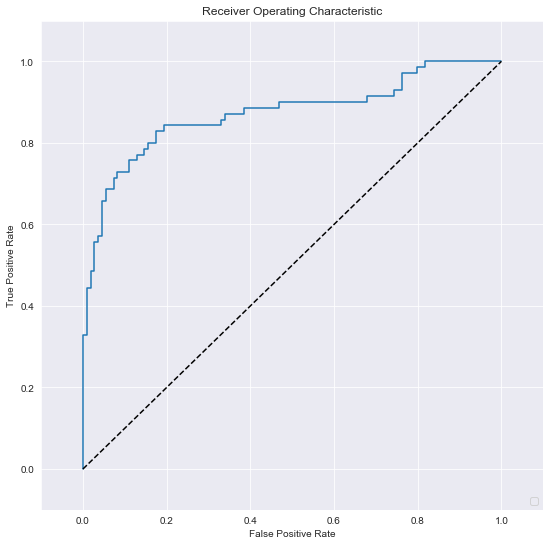

In [93]:
# Inicilized figure
fig=  plt.figure(figsize= (9,9))
plt.title('Receiver Operating Characteristic')

#Plot ROC curve
plt.plot(fpr, tpr)
plt.legend(loc= 'lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [94]:
# AUROC
roc_auc_score(y_val, pred)

0.8720838794233289

# Testing model

In [95]:
#Read data test
data_test = pd.read_csv('csv/test.csv')

In [96]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [97]:
data_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [98]:
test = cleaning_data(data_test)

In [99]:
abt.head()

,PassengerId,Survived,Pclass,Sex,Age,family_members,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,0,1
1,2,1,1,1,38.0,1,1,0,0
2,3,1,3,1,26.0,0,0,0,1
3,4,1,1,1,35.0,1,0,0,1
4,5,0,3,0,35.0,0,0,0,1


In [100]:
test.head()

,PassengerId,Pclass,Sex,Age,family_members,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,1,0
1,893,3,1,47.0,1,0,0,1
2,894,2,0,62.0,0,0,1,0
3,895,3,0,27.0,0,0,0,1
4,896,3,1,22.0,2,0,0,1


In [101]:
test.isna().sum()

PassengerId       0
Pclass            0
Sex               0
Age               0
family_members    0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
dtype: int64

In [103]:
pred_t= model.predict(test)

In [104]:
test['Prediction'] =pred_t

In [105]:
test.head()

,PassengerId,Pclass,Sex,Age,family_members,Embarked_C,Embarked_Q,Embarked_S,Prediction
0,892,3,0,34.5,0,0,1,0,0
1,893,3,1,47.0,1,0,0,1,0
2,894,2,0,62.0,0,0,1,0,0
3,895,3,0,27.0,0,0,0,1,0
4,896,3,1,22.0,2,0,0,1,1


In [116]:
result = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': test.Prediction})
result.shape

(418, 2)

In [118]:
result.to_csv('gender_submission.csv',index=None)